In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [6]:
X=df['v2']
y=df['v1']

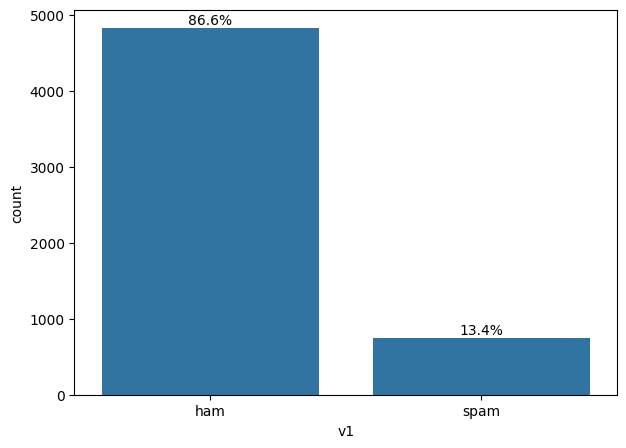

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="v1", data=df)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(X))
    x_countplot = p.get_x() + p.get_width()/2
    y_countplot = p.get_height()+ 50
    ax.annotate(percentage, (x_countplot, y_countplot), ha='center')
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values.ravel(),
    y.values.ravel(),
    test_size=0.20,
    random_state=42)

In [10]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [11]:
clf_method = KNeighborsClassifier()

clf_count_vectorizer = Pipeline([
     ('vectorizer', count_vectorizer),
     ('classifier', clf_method)
 ])

clf_count_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [12]:
clf_tfidf_vectorizer = Pipeline([
     ('vectorizer', tfidf_vectorizer),
     ('classifier', clf_method)
 ])

clf_tfidf_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [13]:
y_train_pred_cvect = clf_count_vectorizer.predict(X_train)
y_train_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_train)

print(f"Train Accuracy using Count Vectorizer: {accuracy_score(y_train, y_train_pred_cvect):.3f}")
print(f"Train Accuracy using TF-IDF Vectorizer: {accuracy_score(y_train, y_train_pred_tfidf_vect):.3f}")

Train Accuracy using Count Vectorizer: 0.973
Train Accuracy using TF-IDF Vectorizer: 0.920


In [14]:
print(classification_report(y_train, y_train_pred_cvect))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3860
        spam       0.99      0.81      0.89       597

    accuracy                           0.97      4457
   macro avg       0.98      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



In [15]:
y_test_pred_cvect = clf_count_vectorizer.predict(X_test)
y_test_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_test)

print(f"Test Accuracy using Count Vectorizer: {accuracy_score(y_test, y_test_pred_cvect):.3f}")
print(f"Test Accuracy using TF-IDF Vectorizer: {accuracy_score(y_test, y_test_pred_tfidf_vect):.3f}")

Test Accuracy using Count Vectorizer: 0.968
Test Accuracy using TF-IDF Vectorizer: 0.916


In [16]:
print(classification_report(y_test, y_test_pred_cvect))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.97      0.78      0.87       150

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [18]:
print(classification_report(y_test, y_test_pred_tfidf_vect))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       965
        spam       1.00      0.37      0.54       150

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.75      1115
weighted avg       0.92      0.92      0.90      1115



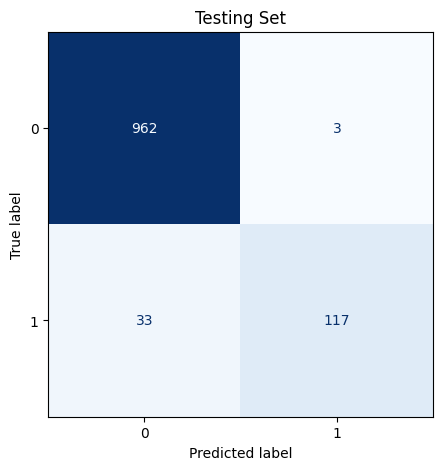

In [17]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_cvect))

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Testing Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False);
